# **Automobile Dataset Analysis**


> *Created by* **Pancham Desai**






## Data Set Information:
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Note: Several of the attributes in the database could be used as a "class" attribute.

### Problem Statement:
To predict  price of the car based on the following attributes

## Attribute information
|Features|Description|
|-----|-----|
|symboling:|-3, -2, -1, 0, 1, 2, 3 |
|normalized-losses:|continuous from 65 to 256.| 
|make:|alfa-romero, audi, bmw, chevrolet, dodge, honda,|
|     |isuzu, jaguar, mazda, mercedes-benz, mercury,| 
|     |mitsubishi, nissan, peugot, plymouth, porsche,| 
|     |renault, saab, subaru, toyota, volkswagen, volvo| 
|fuel-type: | diesel, gas | 
|aspiration: | std, turbo | 
|num-of-doors:| four, two | 
|body-style: | hardtop, wagon, sedan, hatchback, convertible |
|drive-wheels: | 4wd, fwd, rwd | 
|engine-location:|front, rear| 
|wheel-base:|continuous from 86.6 120.9.| 
|length:|continuous from 141.1 to 208.1.|
|width:|continuous from 60.3 to 72.3.|
|height:|continuous from 47.8 to 59.8.|
|curb-weight:|continuous from 1488 to 4066.| 
|engine-type:| dohc, dohcv, l, ohc, ohcf, ohcv, rotor.| 
|num-of-cylinders:|eight, five, four, six, three, twelve, two.| 
|engine-size:|continuous from 61 to 326.|
|fuel-system:|1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.| 
|bore:|continuous from 2.54 to 3.94.| 
|stroke:|continuous from 2.07 to 4.17.| 
|compression-ratio:|continuous from 7 to 23.|
|horsepower:|continuous from 48 to 288.| 
|peak-rpm:|continuous from 4150 to 6600.| 
|city-mpg:|continuous from 13 to 49.|
|highway-mpg:|continuous from 16 to 54.| 
|price:|continuous from 5118 to 45400.|


## **Importing all the required libraries**

In [0]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [0]:
from google.colab import files
uploaded = files.upload()

Saving auto.data to auto.data


## **Loading the Dataset**

---


The dataset was downloaded from uci machine learning repository hence it was in .data format.





In [0]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['auto.data']))
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250


## **EDA** (Exploratory Data analysis)

---


after observing the above format of data it was a strong need to rename all the columns. So i took the attribute information as my reference and renamed all the columns in proper format.The whole dataframe is stored in variable df

In [0]:
#Renaming all columns
df.columns=['risk_rating','average_losses','make','fuel_type','aspiration','no_of_doors','body_style','drivewheels',
'engine_location','wheel_base','length(cm)','width(cm)','height',
'curb_weight','engine_type','num_of_cylinders','enignesize',
'fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','Saleprice']
df.head(5)

,risk_rating,average_losses,make,fuel_type,aspiration,no_of_doors,body_style,drivewheels,engine_location,wheel_base,length(cm),width(cm),height,curb_weight,engine_type,num_of_cylinders,enignesize,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,Saleprice
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250


## Understanding the structure of data.

---
The .info() command helps us to understand the structure of data i.e how many rows does the dataset have ? how many columns the dataset consist of?
What type of data does each column holds ? for example( object/string,int, float)



In [0]:
#Gathering basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
risk_rating          204 non-null int64
average_losses       204 non-null object
make                 204 non-null object
fuel_type            204 non-null object
aspiration           204 non-null object
no_of_doors          204 non-null object
body_style           204 non-null object
drivewheels          204 non-null object
engine_location      204 non-null object
wheel_base           204 non-null float64
length(cm)           204 non-null float64
width(cm)            204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
engine_type          204 non-null object
num_of_cylinders     204 non-null object
enignesize           204 non-null int64
fuel_system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression_ratio    204 non-null float64
horsepower           204 non-nul

## Cleaning of Data

---
* We get our data from opensource platform hence it is not in proper format and it is very much raw. Sometimes there is human error while collecting data and hence it is not possible to work on such raw data therefore cleaning of data is an important step.
* While going through this automobile data which i had downloaded from uci machine learning repository i observed that most of my columns '?'
this sign this indicates that either data is not present or it might be some error so had replaced each and every column having this question mark with '0' for time being with the help of the following command:

```
df['average losses']=df['average losses'].replace('?','0')
```
This function is called as .replace() function which is generally used to replace a string or integer with another string or integer.
* Here in the above snippet i have replaced '?' with '0' and stored result in the coulmn of average losses.
* This process i have carried forward to each and every column where '?' this sign was present.


```
df['average losses']=df['average losses'].astype(int)
```
The above code is used to convert the the 'average losses' column to integer









In [0]:
#Data cleansing of all feature columns
df['average_losses']=df['average_losses'].replace('?','0')
df['average_losses']=df['average_losses'].astype(int)
df['bore']=df['bore'].replace('?','0')
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].replace('?','0')
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].replace('?','0')
df['horsepower']=df['horsepower'].astype(int)
df['peak_rpm']=df['peak_rpm'].replace('?','0')
df['peak_rpm']=df['peak_rpm'].astype(int)
df['Saleprice']=df['Saleprice'].replace('?','0')
df['Saleprice']=df['Saleprice'].astype(int)
df['no_of_doors']=df['no_of_doors'].replace('?','four') # Since the corresponding body style was sedan hence it is obvious that it will have four doors

## Categorical Columns

---

The function written below is used to find out the categorical columns in data.So that we can perform univariate anlaysis of data

In [0]:
def categorical_features(df):
    categorical_col = df.select_dtypes(exclude=np.number).columns.tolist()
    return df[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)
print('='*100)

Categorical Features:
          make fuel_type aspiration no_of_doors   body_style drivewheels  \
0  alfa-romero       gas        std         two  convertible         rwd   
1  alfa-romero       gas        std         two    hatchback         rwd   
2         audi       gas        std        four        sedan         fwd   
3         audi       gas        std        four        sedan         4wd   
4         audi       gas        std         two        sedan         fwd   

  engine_location engine_type num_of_cylinders fuel_system  
0           front        dohc             four        mpfi  
1           front        ohcv              six        mpfi  
2           front         ohc             four        mpfi  
3           front         ohc             five        mpfi  
4           front         ohc             five        mpfi  


## Univariate analysis of categorical features


---
Univariate analysis means analysis of a single variable. It mainly describes the characteristics of the variable.we can either use bar chart or pie chart to find the distribution of variable.
 1. It becomes a difficult task to perform univariate analysis to each and every categorical feature separately hence i had created variable called categorical_columns above and applied the function of univariate analysis to it.












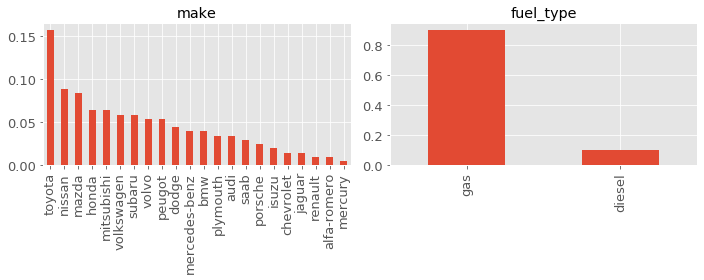

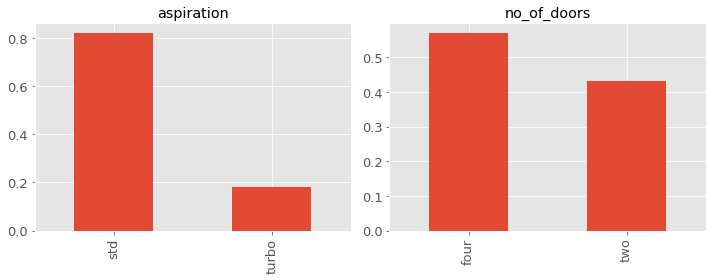

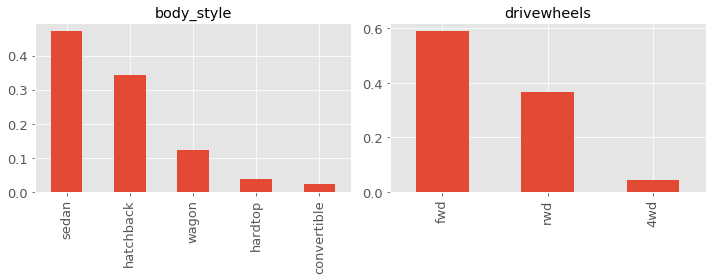

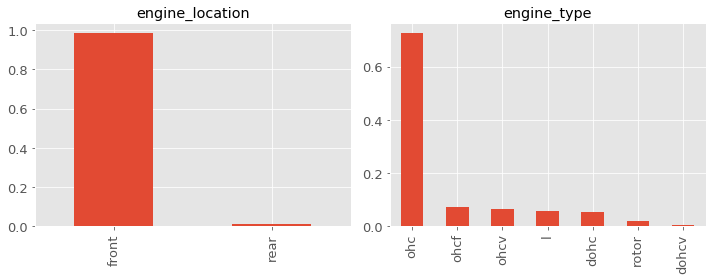

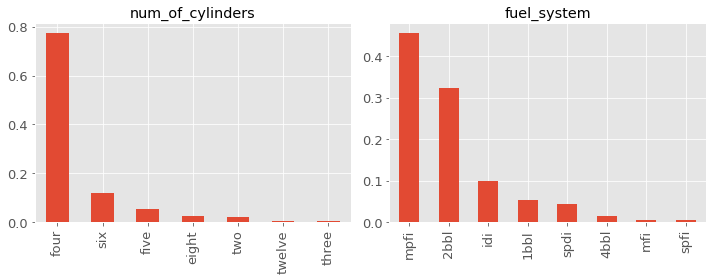

In [0]:
def plot_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                df[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                df[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()
plot = plot_categorical_columns(df)

### **Observations**
 1. Toyota car company manufactures the maximum number of cars as compared to others
 2. Most of the cars run on gas very less number of car runs on diesel
 3.The number of cars that are manufctured have 4 doors is greater than cars having two doors
 4. Sedan class body style is more in demand as comapred to others
 5. The number of cars having front wheel drive is more as compared to rear wheel drive(rwd) and two wheel drive (2wd)
 6. Most of the cars engine is located in the front side of car.
 7. Ohc engine type is quite familiar in most of the cars.The advantage of the OHC design is that valves are operated almost directly by the camshaft, which makes it easier to maintain precise timing at higher rpms.
 8. The car makers are manufacturing more four cylinders cars as compared to 2,3,5,6,8 and 12 cylinders. since its pickup is powerful and also it  also gives a good average
 9. Mpfi(Multi Point Fuel Injection) fuel system is quite popular between car makers since It increases fuel efficiency of the engine. With MPFI system vehicle have less emissions.

## Numerical Columns


---
Below i have written the function to find out all the numeric columns present in data



In [0]:
#code to find out all Numeric columns
def numeric_features(df):
    numeric_col = df.select_dtypes(include=np.number).columns.tolist()
    return df[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

Numeric Features:
   risk_rating  average_losses  wheel_base  length(cm)  width(cm)  height  \
0            3               0       88.60      168.80      64.10   48.80   
1            1               0       94.50      171.20      65.50   52.40   
2            2             164       99.80      176.60      66.20   54.30   
3            2             164       99.40      176.60      66.40   54.30   
4            2               0       99.80      177.30      66.30   53.10   

   curb_weight  enignesize  bore  stroke  compression_ratio  horsepower  \
0         2548         130  3.47    2.68               9.00         111   
1         2823         152  2.68    3.47               9.00         154   
2         2337         109  3.19    3.40              10.00         102   
3         2824         136  3.19    3.40               8.00         115   
4         2507         136  3.19    3.40               8.50         110   

   peak_rpm  city_mpg  highway_mpg  Saleprice  
0      5000        2

## Check the Distribution of Numeric Data

---
Before using these features to build a model we should have knowledge about the distribution of data i.e (The distribution of data is uniform or any skewness is present in it)


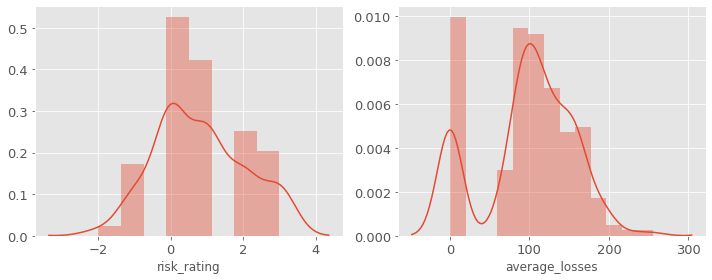

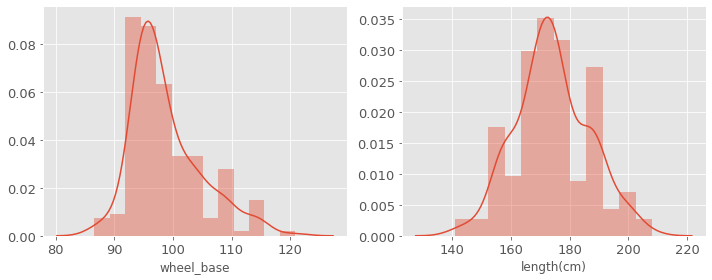

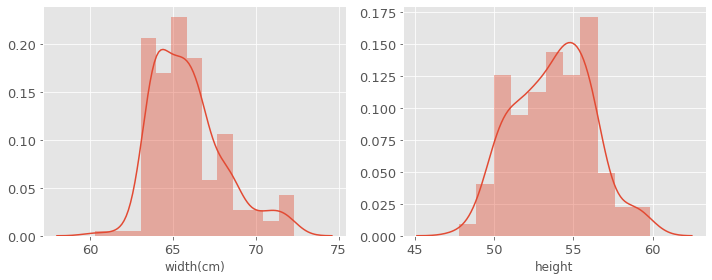

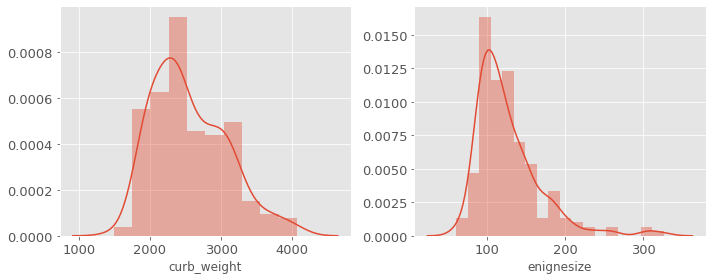

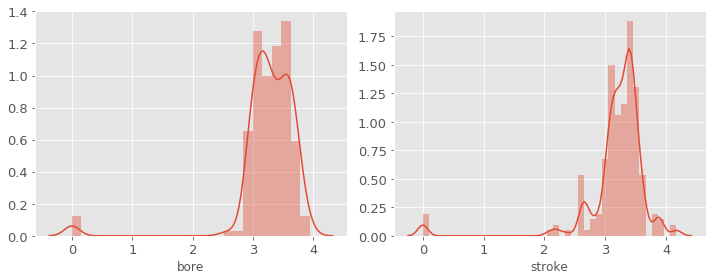

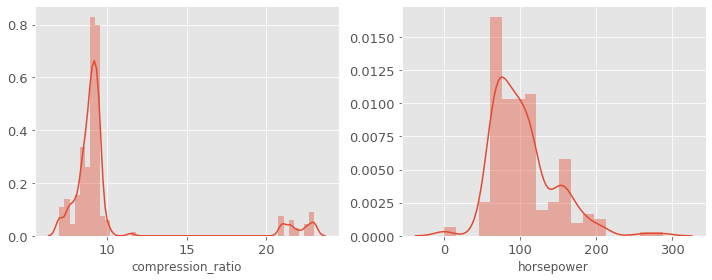

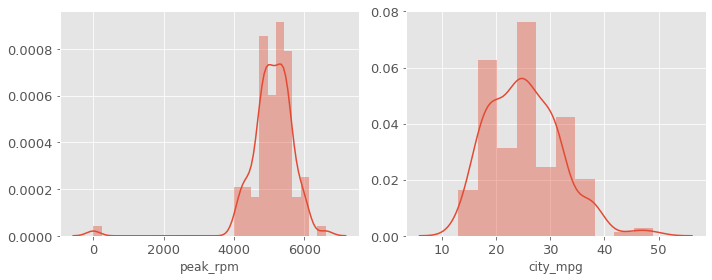

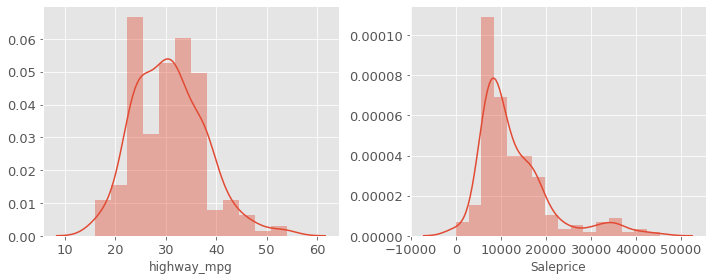

In [0]:
#Lets check the nature of continous feature
def plot_continuous_columns(df):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    df = df[numeric_columns]
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(df[numeric_columns[i]], kde=True)
            plt.subplot(122)            
            sns.distplot(df[numeric_columns[i+1]], kde=True)
            plt.tight_layout()
            plt.show()
plot_continuous_columns(df)  

### **Observation**
After observing the above distributions we can say that the numerical features we have some of them are uniformly spread and some of them are skewed.
Features like Saleprice,compression ratio,bore are skewed. 

## Label Encoding of Cateorical Features

---
* what is label encoding ?
 1. While working with machine learning projects we usually  have to deal 
with datasets that contain labels in multiple columns.These labels can be in the form of string or integers.To make it understandable to the humans.The training data is often labeled with words.
 2. Label encoding generally deals with converting categorical columns to numerical column and machine readable form . It is an important step for structured dataset in Machine learning

for example :
 Suppose we have a column Height in some dataset.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Capture-190.png)

After applying label encoding, the Height column is converted into:

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Capture-191.png)

**image ref : geeks for geeks**

* Here i have tried to convert the categorical columnns to numerical using 'LabelEncoder()' so that i have more number features availaible and  also i can check if any of this feature is highly correlated to my target variable if yes then in can use those features to build my linear model.


In [0]:
#Converting Categorical column to numerical
#label encoding categorical columns
le=LabelEncoder()
# Encoding for fuel type column
df['fuel_type']=le.fit_transform(df['fuel_type'])
#Encoding for body style column
df['body_style']=le.fit_transform(df['body_style'])
#Encoding for drive wheels column
df['drivewheels']=le.fit_transform(df['drivewheels'])
#Encoding for engine-location column
df['engine_location']=le.fit_transform(df['engine_type'])
#Encoding for number of cylinders column
df['num_of_cylinders']=le.fit_transform(df['num_of_cylinders'])
#Encoding for fuel system column
df['fuel_system']=le.fit_transform(df['fuel_system'])
#Encoding for aspiration column
df['aspiration']=le.fit_transform(df['aspiration'])
#Encoding for number of doors column
df['no_of_doors']=le.fit_transform(df['no_of_doors'])
#Encoding for engine type column
df['engine_type']=le.fit_transform(df['engine_type'])
#Encoding of make column
df['make']=le.fit_transform(df['make'])
#Encoding peak-rpm
df['peak_rpm']=le.fit_transform(df['peak_rpm'])

## Statistical analysis of data

---


The .describe() function is generally used to perform the statistical analysis of dataset.


1.   Count - It specifies the total number of values present in the column
2.   mean -  It specifies the mean of the column
3.   std  -  It specifies the standard deviation of column
4.   25%  -  It shows the value of the 25th percentile of that specific                column
5.   50%  - It shows the value of the 50th percentile of that specific                column
6.   75%   - It shows the value of the 75th percentile of that specific                column
7.   max   - It shows the maximum value present in the column.












In [0]:
df.describe()

,risk_rating,average_losses,make,fuel_type,aspiration,no_of_doors,body_style,drivewheels,engine_location,wheel_base,length(cm),width(cm),height,curb_weight,engine_type,num_of_cylinders,enignesize,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,Saleprice
count,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00
mean,0.82,98.08,12.25,0.90,0.18,0.43,2.63,1.32,3.03,98.81,174.08,65.92,53.75,2555.60,3.03,2.12,126.89,3.25,3.26,3.19,10.15,103.20,12.38,25.24,30.77,12946.75
std,1.24,58.02,6.23,0.30,0.39,0.50,0.84,0.56,1.04,5.99,12.36,2.15,2.42,521.96,1.04,0.80,41.74,2.01,0.54,0.55,3.98,40.93,5.35,6.55,6.90,8098.83
min,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.60,141.10,60.30,47.80,1488.00,0.00,0.00,61.00,0.00,0.00,0.00,7.00,0.00,0.00,13.00,16.00,0.00
25%,0.00,77.75,8.00,1.00,0.00,0.00,2.00,1.00,3.00,94.50,166.30,64.07,52.00,2145.00,3.00,2.00,97.00,1.00,3.12,3.11,8.57,70.00,9.00,19.00,25.00,7669.00
50%,1.00,103.00,12.00,1.00,0.00,0.00,3.00,1.00,3.00,97.00,173.20,65.50,54.10,2414.00,3.00,2.00,119.50,5.00,3.31,3.29,9.00,95.00,13.00,24.00,30.00,10096.50
75%,2.00,137.00,19.00,1.00,0.00,1.00,3.00,2.00,3.00,102.40,183.20,66.90,55.50,2939.25,3.00,2.00,142.00,5.00,3.58,3.41,9.40,116.00,17.00,30.00,34.50,16500.00
max,3.00,256.00,21.00,1.00,1.00,1.00,4.00,2.00,6.00,120.90,208.10,72.30,59.80,4066.00,6.00,6.00,326.00,7.00,3.94,4.17,23.00,288.00,23.00,49.00,54.00,45400.00


## Handling Missing Values 

---
Intially i had replaced '?' with '0' lets call it as a dummy value.But for further process we can't rely on this dummy value we need to deal with it very much smartly hence i had imputed some value inplace of dummy value after carefully refering the above the statistical analysis.
1. I had imputed median values inplace of 0 in average losses column since the difference between mean value and max values is shown high in statistical analysis.
2. I had imputed mean value inplace of 0  the difference mean and max value is less

python implementation:


```
from sklearn.impute import SimpleImputer   #importing the library
median_Imputer=SimpleImputer(missing_values=0,strategy='median') # Replace median value of column in place of 0 simailary if you keep strategy='Mean' it will replace with mean value
median_Imputer=median_Imputer.fit(df[['average losses']]) # Applies the transformation on the column
```





In [0]:
#Imputing values based mean and median
#Imputing median values inplace of 0 in   average losses column since the difference between mean value and max values is shown high in statistical analysis  
median_Imputer=SimpleImputer(missing_values=0,strategy='median')
median_Imputer=median_Imputer.fit(df[['average_losses']])
df['average_losses']=median_Imputer.transform(df[['average_losses']])
#Imputing mean value in bore column  inplace of 0 since in bore column the difference mean and max value is less
mean_Imputer=SimpleImputer(missing_values=0,strategy='mean')
mean_Imputer=mean_Imputer.fit(df[['bore']])
df['bore']=mean_Imputer.transform(df[['bore']])
#Similarly mean imputation for stroke column reason for mean imputation is similar to stroke column
mean_Imputer=SimpleImputer(missing_values=0,strategy='mean')
mean_Imputer=mean_Imputer.fit(df[['stroke']])
df['stroke']=mean_Imputer.transform(df[['stroke']])
#Mean Imputation for horsepower column
mean_Imputer=SimpleImputer(missing_values=0,strategy='mean')
mean_Imputer=mean_Imputer.fit(df[['horsepower']])
df['horsepower']=mean_Imputer.transform(df[['horsepower']])
#Mean Imputation for peak rpm column
mean_Imputer=SimpleImputer(missing_values=0,strategy='mean')
mean_Imputer=mean_Imputer.fit(df[['horsepower']])
df['horsepower']=mean_Imputer.transform(df[['horsepower']])
#Median Imputation for horsepower column
median_Imputer=SimpleImputer(missing_values=0,strategy='median')
median_Imputer=median_Imputer.fit(df[['Saleprice']])
df['Saleprice']=median_Imputer.transform(df[['Saleprice']])
df.head(5)

,risk_rating,average_losses,make,fuel_type,aspiration,no_of_doors,body_style,drivewheels,engine_location,wheel_base,length(cm),width(cm),height,curb_weight,engine_type,num_of_cylinders,enignesize,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,Saleprice
0,3,115.00,0,1,0,1,0,2,0,88.60,168.80,64.10,48.80,2548,0,2,130,5,3.47,2.68,9.00,111.00,11,21,27,16500.00
1,1,115.00,0,1,0,1,2,2,5,94.50,171.20,65.50,52.40,2823,5,3,152,5,2.68,3.47,9.00,154.00,11,19,26,16500.00
2,2,164.00,1,1,0,0,3,1,3,99.80,176.60,66.20,54.30,2337,3,2,109,5,3.19,3.40,10.00,102.00,17,24,30,13950.00
3,2,164.00,1,1,0,0,3,0,3,99.40,176.60,66.40,54.30,2824,3,1,136,5,3.19,3.40,8.00,115.00,17,18,22,17450.00
4,2,115.00,1,1,0,1,3,1,3,99.80,177.30,66.30,53.10,2507,3,1,136,5,3.19,3.40,8.50,110.00,17,19,25,15250.00


## Creating a new dataframe for model training

---


It is always a good habit to keep a training dataframe and your original dataframe different so that any changes or transformation you make on train dataframe does not affect the original data frame.

In [0]:
#Creating a new dataframe called train_data
train_data=df[['risk_rating','average_losses','make','fuel_type','aspiration','no_of_doors','body_style','drivewheels','engine_location','wheel_base','length(cm)','width(cm)','height','curb_weight',
               	'engine_type','num_of_cylinders','enignesize','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','Saleprice']]
train_data=pd.DataFrame(train_data)
train_data.head()

,risk_rating,average_losses,make,fuel_type,aspiration,no_of_doors,body_style,drivewheels,engine_location,wheel_base,length(cm),width(cm),height,curb_weight,engine_type,num_of_cylinders,enignesize,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,Saleprice
0,3,115.00,0,1,0,1,0,2,0,88.60,168.80,64.10,48.80,2548,0,2,130,5,3.47,2.68,9.00,111.00,11,21,27,16500.00
1,1,115.00,0,1,0,1,2,2,5,94.50,171.20,65.50,52.40,2823,5,3,152,5,2.68,3.47,9.00,154.00,11,19,26,16500.00
2,2,164.00,1,1,0,0,3,1,3,99.80,176.60,66.20,54.30,2337,3,2,109,5,3.19,3.40,10.00,102.00,17,24,30,13950.00
3,2,164.00,1,1,0,0,3,0,3,99.40,176.60,66.40,54.30,2824,3,1,136,5,3.19,3.40,8.00,115.00,17,18,22,17450.00
4,2,115.00,1,1,0,1,3,1,3,99.80,177.30,66.30,53.10,2507,3,1,136,5,3.19,3.40,8.50,110.00,17,19,25,15250.00


## Correlation Visualization

---
 what is Correlation ?

* The Correlation  is done to find out how well the two quantitative variable are correlated to one another.There are two types of correlation:
1. Positive Correlation
Correlation of two variables is said to be positive when their value changes in same direction.

2. Negative Correlation
Correlation of two variables is said to be negative when their value changes in opposite direction. 

The value of Correlation is between -1 to 1 where 1 means perfectly positively correlated and  -1 means perfectly negatively correlated.

![alt text](https://www.simplypsychology.org/correlation.jpg)

* **image ref** : Google images

There are two methods to calculate correlation:
1. Karls Pearson : This method is generally used to calculate the correlation between two quantitative variables. 
Formula for Karls pearson is as follows:

![alt text](https://www.onlinemath4all.com/images/pearsoncorrelation1.png)

* **image ref** : onlinemath4all.com

According to formula it states that it is ratio of covariance of x & y to standard deviation deviation of x and y

2. Spearmans : It is generally used when data is skewed on and ordinal in nature and robust when extreme values are present.The Formula is as follows:

![alt text](https://www.includehelp.com/ml-ai/Images/spearmans-correlation.jpg)

* **image ref**: Google images


* In our automobile dataset we are using pearson's correlation coefficient because our data is  quantitative in nature  







# Correlation Heatmap

---
Here i had tried to create the correlation heatmap using seaborn library here you can observe values with different shade of colour and beside it you can see a color scale. The darker the shade the less it is correlated with the corresponding variable whereas the lighter the shade the more it is corrrelated with the corresponding variable. 









<Figure size 1080x1080 with 0 Axes>

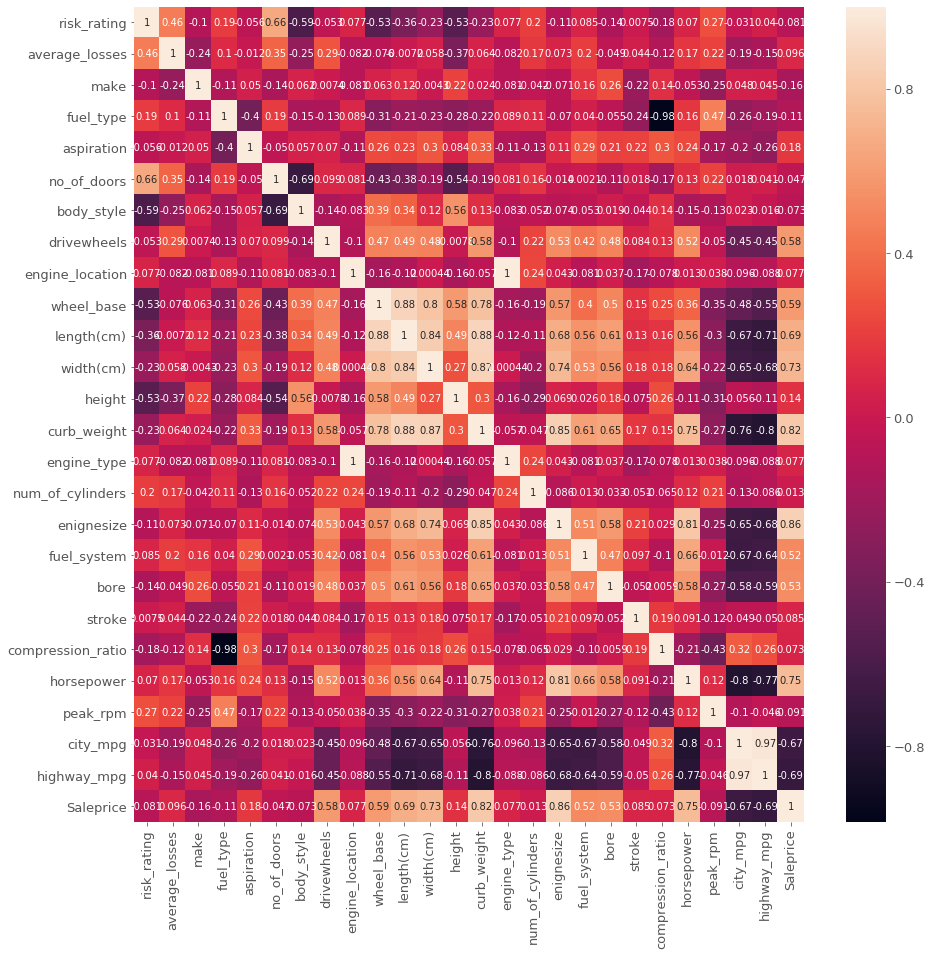

In [0]:
#Correlation Visualization
correlation=train_data.corr()# correlation method by default 'Pearson' and since the data is quantitative in nature we are using pearson corelation coefficient
plt.figure(figsize=[15,15])# size of heatmap is specified
sns.heatmap(correlation,annot=True)#heatmap visualizaton command using seaborn

**Observation** :

The numerical features having correlation greater than 0.6 are as follows:
* 

```
 ['length(cm)', 'width(cm)', 'curb-weight', 'enignesize', 'horsepower',
'city-mpg', 'highway-mpg' ]
```
Out of all these i will be using only 'enignesize', 'horsepower',
'city-mpg' since they are least correlated among themselves and strongly correlated with target variable


## ANOVA test on categorical variables

---
What is Anova ?
* Analysis of variance (ANOVA) is another method to check for a close relationship between two variables.The proportion of variance and variability is figured out by the f-score and p-value. The higher the f-score more close relationship between two variables. The p-value must be less than 0.05 i.e it is against the null hypothesis.

* Here I had conducted a anova test so that i can find out which categorical variable is more closely related to the target variable.





In [0]:
#Import stats model library to perform anova test 
import statsmodels.api as sm
from statsmodels.formula.api import ols
#one way anova test between make and saleprice column
mod=ols('Saleprice ~ make',data=train_data).fit() 
aov_table=sm.stats.anova_lm(mod, typ=2)
aov_table=pd.DataFrame(aov_table)
print('one way anova test between make and saleprice column:')
aov_table.head()
print('=='*100)
#one way anova test between aspiration and saleprice column
mod1=ols('Saleprice ~ aspiration',data=train_data).fit()
aov_table1=sm.stats.anova_lm(mod1, typ=2)
aov_table1=pd.DataFrame(aov_table1)
print('one way anova test between aspiration and saleprice column:')
aov_table1.head()
print('=='*100)
#one way anova test between no_of_doors and saleprice column
mod2=ols('Saleprice ~no_of_doors',data=train_data).fit()
aov_table2=sm.stats.anova_lm(mod2, typ=2)
aov_table2=pd.DataFrame(aov_table2)
print('one way anova test between no_of_doors and saleprice column:')
aov_table2.head()
print('=='*100)
#one way anova test between body_style  and saleprice column
mod3=ols('Saleprice ~ body_style',data=train_data).fit()
aov_table3=sm.stats.anova_lm(mod3, typ=2)
aov_table3=pd.DataFrame(aov_table3)
print('one way anova test between body_style and saleprice column:')
aov_table3.head()
print('=='*100)
#one way anova test between   and saleprice column
mod4=ols('Saleprice ~ drivewheels',data=train_data).fit()
aov_table4=sm.stats.anova_lm(mod4, typ=2)
aov_table4=pd.DataFrame(aov_table4)
print('one way anova test between drivewheels and saleprice column:')
aov_table4.head()
print('=='*100)
#one way anova test between engine_location  and saleprice column
mod5=ols('Saleprice ~ engine_location',data=train_data).fit()
aov_table5=sm.stats.anova_lm(mod5, typ=2)
aov_table5=pd.DataFrame(aov_table5)
print('one way anova test between engine_location  and saleprice column:')
aov_table5.head()
print('=='*100)
#one way anova test between engine_type and saleprice column
mod6=ols('Saleprice ~ engine_type',data=train_data).fit()
aov_table6=sm.stats.anova_lm(mod6, typ=2)
aov_table6=pd.DataFrame(aov_table6)
print('one way anova test between engine_location  and saleprice column:')
aov_table6.head()
print('=='*100)
##one way anova test between num_of_cylinders and saleprice column
mod7=ols('Saleprice ~ num_of_cylinders',data=train_data).fit()
aov_table7=sm.stats.anova_lm(mod7, typ=2)
aov_table7=pd.DataFrame(aov_table7)
print('one way anova test between num_of_cylinders and saleprice column:')
aov_table7.head()
print('=='*100)
#one way anova test between fuel_system  and saleprice column
mod8=ols('Saleprice ~ fuel_system',data=train_data).fit()
aov_table8=sm.stats.anova_lm(mod8, typ=2)
aov_table8=pd.DataFrame(aov_table8)
print('one way anova test between fuel_system and saleprice column:')
aov_table8.head()
print('=='*100)

one way anova test between make and saleprice column:


,sum_sq,df,F,PR(>F)
make,309184091.59,1.00,5.05,0.03
Residual,12355702473.09,202.00,nan,nan


one way anova test between aspiration and saleprice column:


,sum_sq,df,F,PR(>F)
aspiration,391980417.25,1.00,6.45,0.01
Residual,12272906147.44,202.00,nan,nan


one way anova test between no_of_doors and saleprice column:


,sum_sq,df,F,PR(>F)
no_of_doors,27895330.06,1.00,0.45,0.51
Residual,12636991234.63,202.00,nan,nan


one way anova test between body_style and saleprice column:


,sum_sq,df,F,PR(>F)
body_style,66798213.43,1.00,1.07,0.30
Residual,12598088351.26,202.00,nan,nan


one way anova test between drivewheels and saleprice column:


,sum_sq,df,F,PR(>F)
drivewheels,4293391530.82,1.00,103.60,0.00
Residual,8371495033.87,202.00,nan,nan


one way anova test between engine_location  and saleprice column:


,sum_sq,df,F,PR(>F)
engine_location,75465313.14,1.00,1.21,0.27
Residual,12589421251.55,202.00,nan,nan


one way anova test between engine_location  and saleprice column:


,sum_sq,df,F,PR(>F)
engine_type,75465313.14,1.00,1.21,0.27
Residual,12589421251.55,202.00,nan,nan


one way anova test between num_of_cylinders and saleprice column:


,sum_sq,df,F,PR(>F)
num_of_cylinders,2264955.93,1.00,0.04,0.85
Residual,12662621608.76,202.00,nan,nan


one way anova test between fuel_system and saleprice column:


,sum_sq,df,F,PR(>F)
fuel_system,3392245511.41,1.00,73.90,0.00
Residual,9272641053.27,202.00,nan,nan


**Observations:**

1. After observing the anova tests i am going to select only thos features whose p-value is less than 0.0.5 which is shown in PR(>F) column and the features having greater F-score. Since greater F-score denotes that the categorical variable has high amount of  correlation with target variable.

2. After observing anova test and based on the results i have selected only make and aspiration columns to be used while building the model

# Linear regression 

---



**What is Linear Regression ?**
- Linear regression provides a relationship between two variables by fitting a straight line (linear line) to the data .  One variable is feature/dependent variable and another is target variable.
- Consider an example of our dataset, here we are going to predict the car price hence attributes like ('enignesize',
'city_mpg','aspiration','make','Saleprice')are called  as  feature/dependent variable and (Sale price) attribute is considered as  target variable.

* Basic Intuition of linear regression :

![alt text](https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png)

Generally on x-axis we have our feature variable and on y-axis is target variable


**Why Linear Regression for our dataset ?**
* We have observed that there is a linear relationship between the feature and target variable and also our target variable(Saleprice) is continous therefore it is a regression task and hence we have used linear regression

**The equation of linear regression is :**

- prediction = theta_0 + theta_1*features

where theta_0 = intercept & theta_1 = slope


 In our dataset the linear relationship between the features and target will be captured in the following form: 

 - Predicted Saleprice = theta_0 + theta_1 * enignesize+ theta_2 * horsepower +theta_3 * city_mpg  + theta_4 * aspiration+ theta_5 * make + residuals

we get the values of theta_0 and theta_1 using **OLS (Ordinary Least Squares Method)**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable.


**Assumptions of Linear Regression :**

 1. Linearity : All the features must have linear relationship with target variable.

 2. No Multicollinearity : The independent features should not be correlated within themselves

 3. Normality of residual :  first of all residual means difference between the observed value of the dependent variable (y) and the predicted value (ŷ).Each data point has one residual.

   The distribution of residual must be always normal.

 4. Homoscedasticity :Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

 5. No auto correlation of residuals :Linear regression analysis requires that there is little or no autocorrelation in the data.  Autocorrelation occurs when the residuals are not independent from each other

After observing the heatmap and Anova tests i have made sure that the first two assumptions  are satisfied others can be satisfied after building the model.

Lets begin with model building !!



**step 1:** The code shown in the cell below i am trying to create a dataframe of features on which i am going to build the linear model

In [0]:
#Lets predict on these highley correlated features with target variable

#Create dataframe for training the model
train_data_new=train_data[['enignesize',
'city_mpg','aspiration','make','Saleprice']]
train_data_new

,enignesize,city_mpg,aspiration,make,Saleprice
0,130,21,0,0,16500.00
1,152,19,0,0,16500.00
2,109,24,0,1,13950.00
3,136,18,0,1,17450.00
4,136,19,0,1,15250.00
...,...,...,...,...,...
199,141,23,0,21,16845.00
200,141,19,1,21,19045.00
201,173,18,0,21,21485.00
202,145,26,1,21,22470.00


**step 2:** Splitting the data into train and test using the sklearn library which i have loaded in the start of this notebook


```
from sklearn.model_selection import train_test_split
```
The X variable consist of all the feature columns and y variable consist of all the target variable.
This is the manadatory step for building any model because it divides the data properly into train and test. The test_size=0.25 says that test size is 25 % of dataset and train size is 75 %


In [0]:
#Train test split
X=train_data_new.drop(['Saleprice'],1)
y=train_data_new['Saleprice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

**step 3:**
*  k-fold cross-validation randomly divides the data into k blocks of roughly equal size. Each of the blocks is left out in turn and the other k-1 blocks are used to train the model. The held out block is predicted and these predictions are summarized into some type of performance measure (e.g. accuracy, root mean squared error (RMSE), etc.). The k estimates of performance are averaged to get the overall resampled estimate. k is 10 or sometimes 5. Why? I have no idea. When k is equal to the sample size, this procedure is known as Leave-One-Out CV. 

* Repeated k-fold CV does the same as above but more than once. For example, five repeats of 10-fold CV would give 50 total resamples that are averaged. Note this is not the same as 50-fold CV.

```
from sklearn.model_selection import RepeatedKFold
```



In [0]:
#Repeated Kfold
rkf=RepeatedKFold(n_splits=5, n_repeats=2, random_state=9)

**step 4 :** Building the Linear model using sklearn library
The library shown below is already imported in the beginning of the notebook

```
from sklearn.linear_model import LinearRegression
```



In [0]:
#Building the linear model
model=LinearRegression()
model.fit(X_train,y_train) # It loads all the coefficents in the linear regression equation
y_pred=model.predict(X_test) # Once the coefficients are fitted in the the equation it is ready to predict

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**step 5 :** Cross validation process is already explained in step 3

In [0]:
#Crossvalidation process
cv_score=cross_val_score(model,X,y,cv=rkf,scoring='r2')
print('=='*100)
print('Standard deviation of cross validation score:')
print(cv_score.std()) # Calculated the standard deviation of the scores to check how much does the score varies from mean point.If the std is less that means the model is balance
print('=='*100)


Standard deviation of cross validation score:
0.07124580196815103


**step 6 :** 

Evaluation Metric

  * **MSE (Mean square error)**

The most simple and common metric for regression evaluation, but also probably the least useful. It is defined by the equation   

![alt text](https://miro.medium.com/max/600/1*3wB5otkgKEiv9X6Gdd0r2Q@2x.png)

**img ref** : www.Medium.com

Where N= no. of observations , yi= actual expected output and yi^= model predicted output

MSE basically measures average squared error of our predictions. For each point, it calculates square difference between the predictions and the target and then average those values.

The higher this value, the worse the model is. It is never negative, since we’re squaring the individual prediction-wise errors before summing them, but would be zero for a perfect model .

* **RMSE(Root mean Sqaure error)**

RMSE is just the square root of MSE. The square root is introduced to make scale of the errors to be the same as the scale of targets.

![alt text](https://miro.medium.com/max/347/1*qz8jRMxmMEwNsFh0Cs5XfQ.png)

To implement mse you will have to import thse library shown below :

```
from sklearn.metrics import mean_squared_error
```
for rmse just add square root to the result of mse


In [0]:
#Evaluation metrics root mean square error
mse =mean_squared_error(y_test,y_pred)
print('mse score:',mse)
print('=='*100)
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print('Rmse score:',rmse)

mse score: 14072178.170675231
Rmse score: 3751.2902008076144


 **R2 Score**

The coefficient of determination, or R² (sometimes read as R-two), is another metric we may use to evaluate a model and it is closely related to MSE, but has the advantage of being scale-free — it doesn’t matter if the output values are very large or very small, the R² is always going to be between -∞ and 1. When R² is negative it means that the model is worse than predicting the mean.

It is implemented using the following library :



```
from sklearn.metrics import r2_score
```







In [0]:

#Evaluation metric  R2 score
R2_Score=r2_score(y_test,y_pred)
print('R2 score:',R2_Score)
print('=='*100)

R2 score: 0.792081752034692


**Accuracy Score :**

It helps to understand how well model is doing on train data as well as test data individually . The score is generally between 0 to 1 . The more it is closer to 1 then better the model is.
Some times it will give a negative score also it means the model is in worse condition


In [0]:
#accuracy score on train data
train_score=model.score(X_train,y_train)
print('train score:',train_score)
print('=='*100)

#accuracy score on test data
test_score=model.score(X_test,y_test)
print('test score:',test_score)
print('=='*100)

train score: 0.7617560159815153
test score: 0.792081752034692


In [0]:
#Residuals
residual = y_test - y_pred
residual.head(5)

172   -1798.47
89     1184.52
55     5069.24
73     5650.26
158     333.52
Name: Saleprice, dtype: float64

## **Assumptions of Linear Regression**


---
Practical representation of all the assumptions of linear regression.


## Linearity


---



<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'enignesize vs Saleprice')

Text(0.5, 1.0, 'city_mpg vs Saleprice')

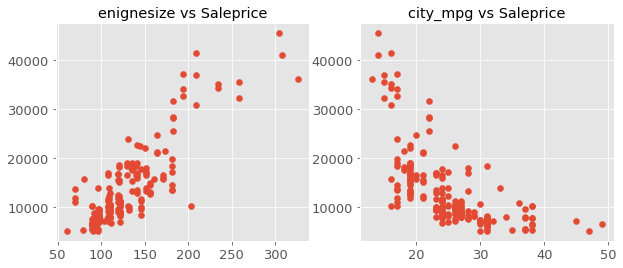

In [0]:
#Lets find out if the continous features are having a linear relationship with target variable
train_data_new=train_data[['enignesize',
'city_mpg','Saleprice']]
plt.figure(figsize=[10,4])
plt.subplot(121)
labels=train_data_new['enignesize']
data=train_data_new['Saleprice']
plt.scatter(x=labels,y=data)
plt.title('enignesize vs Saleprice')

plt.subplot(122)
A=train_data_new['city_mpg']
B=train_data_new['Saleprice']
plt.scatter(x=A,y=B)
plt.title('city_mpg vs Saleprice')


**observations :**

We can observe the clear linear relationship between enginesize and sale price and a slight linear relationship between city_mpg and saleprice. for categorical features we have selected them based on anova tests


## No Multicollinearity


---



In [0]:
# Rule no.1:  No multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,enignesize,city_mpg,aspiration,make
vif,5.02,6.41,1.24,5.13


**observation :**

Based on the VIF (variance inflation factor results) the no multicollinearity assumption criteria is satisfied.Generally the VIF must be less than 5 .As an exception i have kept city_mpg because the difference is just by 1 it wont affect my model that bad even if i keep it .

## Normality of residual

---



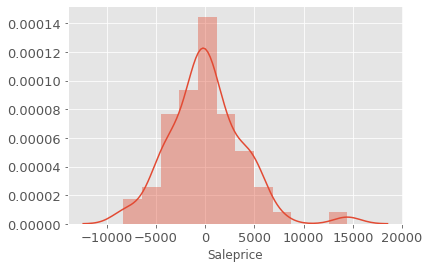

In [0]:
sns.distplot(residual)

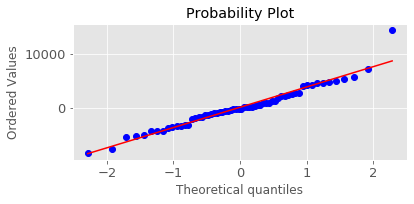

In [0]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

**observation :** 

After looking at the distplot and probability one can easily say that the residuals are  normally distributed . In probability plot the more the datapoints are near the line it states that it is normally distributed

## Homoscedasticity

---



Text(0.5, 1.0, 'Predicted vs Residuals')

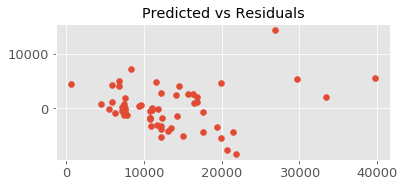

In [0]:
ig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)
plt.title('Predicted vs Residuals')

**observation :**

After looking at the above scatter plot between residual vs predicted it is pretty clear that that distribution of error terms shows random relationship between predicted values and residuals and hence it proves the assumption of homocedastic

## No auto correlation of residuals

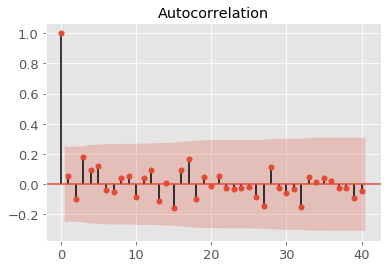

In [0]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

**Observation** :

After observing this plot we can see that there is a boundary of red region at 0.2 and -0.4 if any of the data points crosses this red boundary then our assumption fails since it means that there is autocorrelation between residuals


